In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df=pd.read_excel('Concrete_Data.xls')

In [4]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [5]:
df.shape

(1030, 9)

##### Feature variables are input variables/Independent variables and responsive variable is output variable/dependent variable

In [8]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

### the normal distribution describes how the values of a variable are distributed. It is the most important probability distribution in statistics because it accurately describes the distribution of values for many natural phenomena.For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution.

Application in Machine Learning:
In Machine Learning, data satisfying Normal Distribution is beneficial for model building. It makes math easier. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal. Also, Sigmoid functions work most naturally with normally distributed data.

Many natural phenomena in the world follow a log-normal distribution, such as financial data and forecasting data. By applying transformation techniques, we can convert the data into a normal distribution. Also, many processes follow normality, such as many measurement errors in an experiment, the position of a particle that experiences diffusion, etc.

So it’s better to critically explore the data and check for the underlying distributions for each variable before going to fit the model.

Note: Normality is an assumption for the ML models. It is not mandatory that data should always follow normality. ML models work very well in the case of non-normally distributed data also. Models like decision tree, XgBoost, don’t assume any normality and work on raw data as well. Also, linear regression is statistically effective if only the model errors are Gaussian, not exactly the entire dataset.

<Figure size 864x432 with 0 Axes>

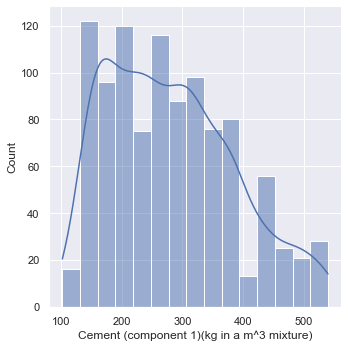

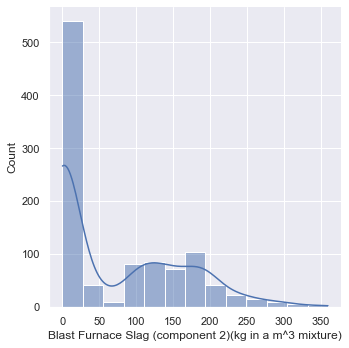

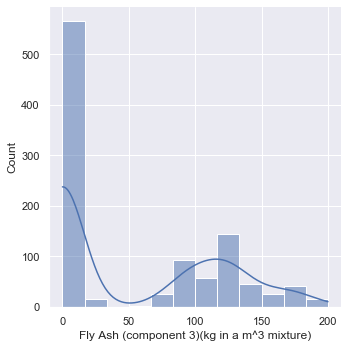

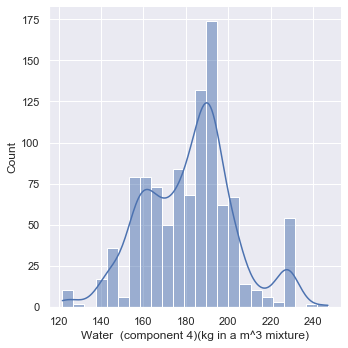

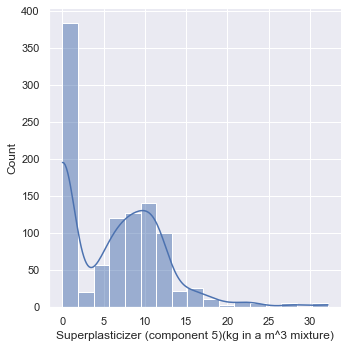

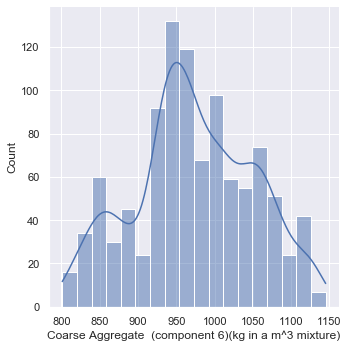

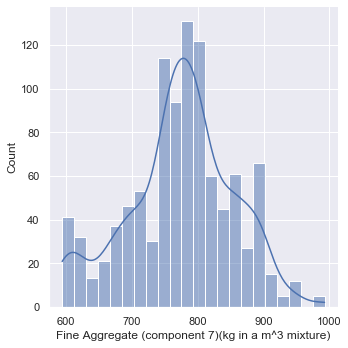

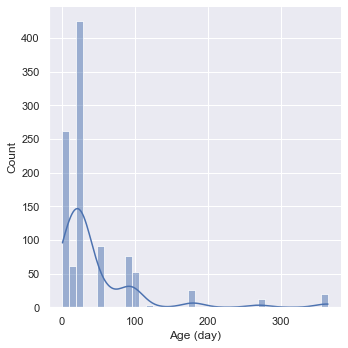

In [83]:

plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

sns.displot(data=df, x="Cement (component 1)(kg in a m^3 mixture)", kde=True)
plt.tight_layout()
sns.displot(data=df, x="Blast Furnace Slag (component 2)(kg in a m^3 mixture)", kde=True)
sns.displot(data=df, x="Fly Ash (component 3)(kg in a m^3 mixture)", kde=True)
sns.displot(data=df, x="Water  (component 4)(kg in a m^3 mixture)", kde=True)
sns.displot(data=df, x="Superplasticizer (component 5)(kg in a m^3 mixture)", kde=True)
sns.displot(data=df, x="Coarse Aggregate  (component 6)(kg in a m^3 mixture)", kde=True)
sns.displot(data=df, x="Fine Aggregate (component 7)(kg in a m^3 mixture)", kde=True)
sns.displot(data=df, x="Age (day)", kde=True)
plt.show()

### Checking Normality with QQ Plot

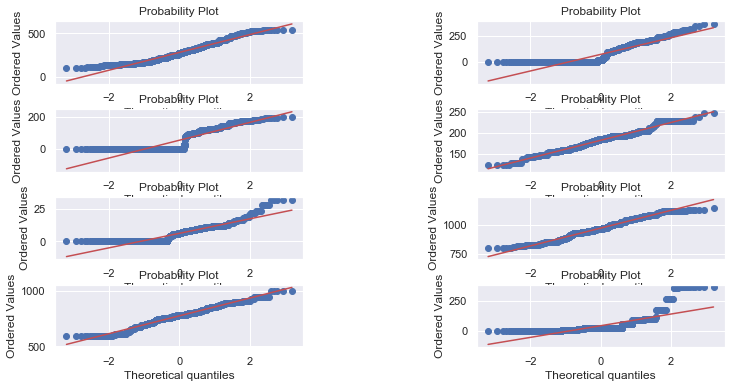

In [77]:
# Initiating a figure
#plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.7)
# Creating a plot with 1 row and 2 cols

plt.subplot(4, 2, 1)
stats.probplot(df['Cement (component 1)(kg in a m^3 mixture)'], dist="norm", plot=plt)

plt.subplot(4, 2, 2)
stats.probplot(df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'], dist="norm", plot=plt)

plt.subplot(4, 2, 3)
stats.probplot(df['Fly Ash (component 3)(kg in a m^3 mixture)'], dist="norm", plot=plt)

plt.subplot(4, 2, 4)
stats.probplot(df['Water  (component 4)(kg in a m^3 mixture)'], dist="norm", plot=plt)

plt.subplot(4, 2, 5)
stats.probplot(df['Superplasticizer (component 5)(kg in a m^3 mixture)'], dist="norm", plot=plt)

plt.subplot(4, 2, 6)
stats.probplot(df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'], dist="norm", plot=plt)

plt.subplot(4, 2, 7)
stats.probplot(df['Fine Aggregate (component 7)(kg in a m^3 mixture)'], dist="norm", plot=plt)

plt.subplot(4, 2, 8)
stats.probplot(df['Age (day)'], dist="norm", plot=plt)

plt.show()

### Fly ash, Superplasticizer, Age are not in normality, they have huge outliers

In [25]:
df1=df

In [26]:
df1

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [8]:
# printing all columns of the dataframe
print(df1.columns.tolist())

['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


In [9]:
df1.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
dtype: int64

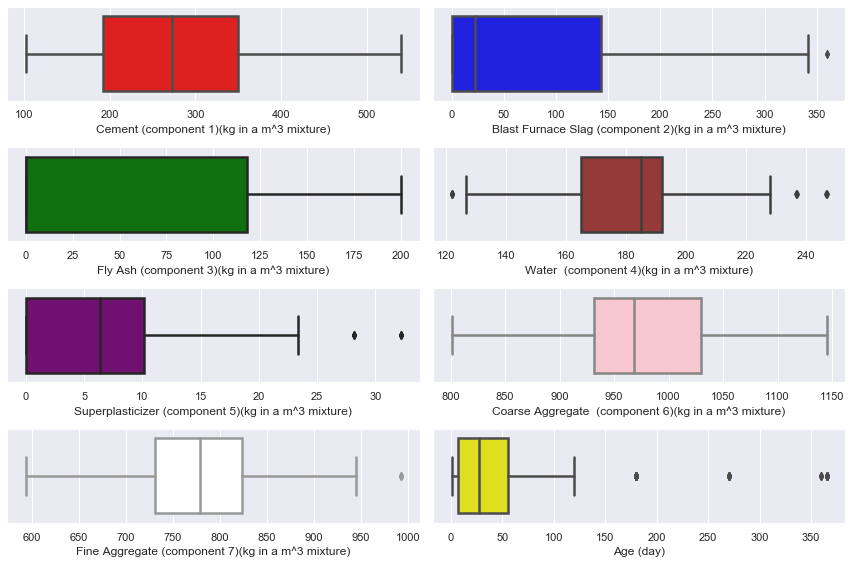

In [72]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 1 row and 2 cols

plt.subplot(4, 2, 1)
sns.boxplot(data=df1,x="Cement (component 1)(kg in a m^3 mixture)",linewidth=2.5,color='red')
plt.tight_layout()

plt.subplot(4, 2, 2)
sns.boxplot(x=df1["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"],linewidth=2.5,color='blue')
plt.tight_layout()

plt.subplot(4, 2, 3)
sns.boxplot(x=df1["Fly Ash (component 3)(kg in a m^3 mixture)"],linewidth=2.5,color='green')
plt.tight_layout()

plt.subplot(4, 2, 4)
sns.boxplot(x=df1["Water  (component 4)(kg in a m^3 mixture)"],linewidth=2.5,color='brown')
plt.tight_layout()

plt.subplot(4, 2, 5)
sns.boxplot(x=df1["Superplasticizer (component 5)(kg in a m^3 mixture)"],linewidth=2.5,color='purple')
plt.tight_layout()

plt.subplot(4, 2, 6)
sns.boxplot(x=df1["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"],linewidth=2.5,color='pink')
plt.tight_layout()

plt.subplot(4, 2, 7)
sns.boxplot(x=df1["Fine Aggregate (component 7)(kg in a m^3 mixture)"],linewidth=2.5,color='white')
plt.tight_layout()

plt.subplot(4, 2, 8)
sns.boxplot(x=df1["Age (day)"],linewidth=2.5,color='yellow')
plt.tight_layout()

plt.show()


In [91]:
print('Skewness for cement:',df1['Cement (component 1)(kg in a m^3 mixture)'].skew())
print('Skewness for Blast Furnace Slag:',df1['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].skew())
print('Skewness for Fly Ash:',df1['Fly Ash (component 3)(kg in a m^3 mixture)'].skew())
print('Skewness for Water:',df1['Water  (component 4)(kg in a m^3 mixture)'].skew())
print('Skewness for Superplasticizer:',df1['Superplasticizer (component 5)(kg in a m^3 mixture)'].skew())
print('Skewness for Coarse Aggregate:',df1['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'].skew())
print('Skewness for Fine Aggregate:',df1['Fine Aggregate (component 7)(kg in a m^3 mixture)'].skew())
print('Skewness for Age (day):',df1['Age (day)'].skew())

Skewness for cement: 0.5095174325609817
Skewness for Blast Furnace Slag: 0.8007373534132386
Skewness for Fly Ash: 0.5374451101484666
Skewness for Water: 0.07432397541502517
Skewness for Superplasticizer: 0.9081127314966221
Skewness for Coarse Aggregate: -0.04020640266624772
Skewness for Fine Aggregate: -0.2529792974476521
Skewness for Age (day): 3.26917740063459


#### Skewness
In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [10]:
# skewness along the index axis
df1.skew(axis = 0, skipna = True)

Cement (component 1)(kg in a m^3 mixture)                0.509517
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.800737
Fly Ash (component 3)(kg in a m^3 mixture)               0.537445
Water  (component 4)(kg in a m^3 mixture)                0.074324
Superplasticizer (component 5)(kg in a m^3 mixture)      0.908113
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.040206
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.252979
Age (day)                                                3.269177
Concrete compressive strength(MPa, megapascals)          0.416922
dtype: float64

##### from the above skewness values "Age(day)" column is highely skewed means have more number of outliers. Remaining all columns are moderately skewed

In [11]:
df1.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [12]:
df1.var()

Cement (component 1)(kg in a m^3 mixture)                10921.742654
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     7444.083725
Fly Ash (component 3)(kg in a m^3 mixture)                4095.548093
Water  (component 4)(kg in a m^3 mixture)                  456.060245
Superplasticizer (component 5)(kg in a m^3 mixture)         35.682602
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      6045.656228
Fine Aggregate (component 7)(kg in a m^3 mixture)         6428.099159
Age (day)                                                 3990.437729
Concrete compressive strength(MPa, megapascals)            279.079717
dtype: float64

##### features like Cement, Water, Coarse Aggregate, Fine Aggregate have huge variations from the mean

#### Handling Outliers:
Till now we learned about detecting the outliers. The main question is WHAT do we do with the outliers?

Below are some of the methods of treating the outliers

- Trimming/removing the outlier
- Quantile based flooring and capping
- Mean/Median imputation


''' Detection '''
#### IQR
Q1 = np.percentile(df1['Age (day)'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1['Age (day)'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df1.shape)
 
#### Upper bound
upper = np.where(df1['Age (day)'] >= (Q3+1.5*IQR))
#### Lower bound
lower = np.where(df1['Age (day)'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)
 
print("New Shape: ", df1.shape)

##### Mean/Median imputation
As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

In [27]:
# from the box plot
median = df1.loc[df['Age (day)']<150, 'Age (day)'].median()
df1["Age (day)"] = np.where(df1["Age (day)"] >150, median,df1['Age (day)'])

In [28]:
median

28.0

In [29]:
df1.shape

(1030, 9)

In [30]:
df1.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,-0.031968,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.032705,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,0.057923,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,-0.044590,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,0.063329,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,0.018076,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,0.052784,-0.167249
Age (day),-0.031968,-0.032705,0.057923,-0.044590,0.063329,0.018076,0.052784,1.000000,0.499852
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.499852,1.000000


In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


#### variance inflation factor
- A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
- Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 
- A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [31]:
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.296075


In [32]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]
  
vif_data

,feature,VIF
0,Cement (component 1)(kg in a m^3 mixture),29.322705
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,4.369005
2,Fly Ash (component 3)(kg in a m^3 mixture),4.351277
3,Water (component 4)(kg in a m^3 mixture),81.993593
4,Superplasticizer (component 5)(kg in a m^3 mix...,5.524445
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,85.547517
6,Fine Aggregate (component 7)(kg in a m^3 mixture),71.847872
7,Age (day),4.487632
8,"Concrete compressive strength(MPa, megapascals)",19.237700


As we can see, Water, Coarse Aggregate, Fine aggregate have very high values of VIF, indicating that these three variables are highly correlated.Water, Coarse Aggregate, Fine aggregate are correlated each other. Hence, considering these three features together leads to a model with high multicollinearity.Cement is also highly correlated but 


Problems we face if we not treat multi collinearity
- The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

What Problems Do Multicollinearity Cause?
Multicollinearity causes the following two basic types of problems:

The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.
Imagine you fit a regression model and the coefficient values, and even the signs, change dramatically depending on the specific variables that you include in the model. It’s a disconcerting feeling when slightly different models lead to very different conclusions. You don’t feel like you know the actual effect of each variable!

Now, throw in the fact that you can’t necessarily trust the p-values to select the independent variables to include in the model. This problem makes it difficult both to specify the correct model and to justify the model if many of your p-values are not statistically significant.

As the severity of the multicollinearity increases so do these problematic effects. However, these issues affect only those independent variables that are correlated. You can have a model with severe multicollinearity and yet some variables in the model can be completely unaffected.


Do I Have to Fix Multicollinearity?
Multicollinearity makes it hard to interpret your coefficients, and it reduces the power of your model to identify independent variables that are statistically significant. These are definitely serious problems. However, the good news is that you don’t always have to find a way to fix multicollinearity.

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

- The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
- Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. Suppose your model contains the experimental variables of interest and some control variables. If high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems.
- Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.


### To reduce the multi collinearity, we need to standardise the data and we can do PCA also

Center the Independent Variables to Reduce Structural MulticollinearityIn our model, the interaction term is at least partially responsible for the high VIFs. Both higher-order terms and interaction terms produce multicollinearity because these terms include the main effects. Centering the variables is a simple way to reduce structural multicollinearity.Centering the variables is also known as standardizing the variables by subtracting the mean. This process involves calculating the mean for each continuous independent variable and then subtracting the mean from all observed values of that variable. Then, use these centered variables in your model. Most statistical software provides the feature of fitting your model using standardized variables.

There are two basic kinds of multicollinearity:
- Structural multicollinearity: This type occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.
- Data multicollinearity: This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.

How to Deal with Multicollinearity
I showed how there are a variety of situations where you don’t need to deal with it. The multicollinearity might not be severe, it might not affect the variables you’re most interested in, or maybe you just need to make predictions. Or, perhaps it’s just structural multicollinearity that you can get rid of by centering/Standardization of  the variables.

But, what if you have severe multicollinearity in your data and you find that you must deal with it? What do you do then? Unfortunately, this situation can be difficult to resolve. There are a variety of methods that you can try, but each one has some drawbacks. You’ll need to use your subject-area knowledge and factor in the goals of your study to pick the solution that provides the best mix of advantages and disadvantages.

The potential solutions include the following:

- Remove some of the highly correlated independent variables.
- Linearly combine the independent variables, such as adding them together.
- Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.
- LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity. If you know how to perform linear least squares regression, you’ll be able to handle these analyses with just a little additional study.


- As you consider a solution, remember that all of these have downsides. If you can accept less precise coefficients, or a regression model with a high R-squared but hardly any statistically significant variables, then not doing anything about the multicollinearity might be the best solution.

In [33]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(df1)

In [34]:
std_data = pd.DataFrame(std_data, columns = ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) '])

In [35]:
std_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.153159,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.153159,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.153159,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.153159,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,-0.153159,0.507753
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.153159,0.507051
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.153159,-0.277827
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.153159,-0.725928
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.153159,-0.182649


In [36]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = std_data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(std_data.values, i)
                          for i in range(len(std_data.columns))]
  
vif_data

,feature,VIF
0,Cement (component 1)(kg in a m^3 mixture),8.876652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,7.667765
2,Fly Ash (component 3)(kg in a m^3 mixture),6.190102
3,Water (component 4)(kg in a m^3 mixture),7.144423
4,Superplasticizer (component 5)(kg in a m^3 mix...,2.991566
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,5.085244
6,Fine Aggregate (component 7)(kg in a m^3 mixture),6.994307
7,Age (day),1.919922
8,"Concrete compressive strength(MPa, megapascals)",3.442024


From the above dataframe we can say the variation inflation factor for most of the features is greater than 5, so we need to
use some advanced form multi collinearity reduction techniques like Lasso regression, ridge regression, PCA etc

In [37]:
#Input and output dataset
target=std_data['Concrete compressive strength(MPa, megapascals) ']
std_data=std_data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [38]:
std_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.153159
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.153159
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.153159
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.153159
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,-0.153159


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(std_data, target, train_size = 0.75, random_state = 0)

In [40]:
from sklearn import metrics

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [42]:
regressors=[
            LinearRegression(),
            Lasso(alpha=0.1,random_state=0),
            Ridge(alpha=1.0,random_state=0),
            DecisionTreeRegressor(max_depth=6, random_state=0),
            RandomForestRegressor(max_depth=6, random_state=0),
            KNeighborsRegressor(n_neighbors=8),
            SVR()
]

In [43]:
regressor_names=['LinearRegression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','Support Vector Regression']

In [44]:
R2_score_train=[]
R2_score_test=[]

for regressor in regressors:
    model=regressor.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    r2_train=metrics.r2_score(y_train, y_train_pred)
    R2_score_train.append(r2_train)
    print('R2 score for train data ', r2_train)
    y_test_pred = model.predict(X_test)
    r2_test=metrics.r2_score(y_test, y_test_pred)
    R2_score_test.append(r2_test)
    print('R2 score for test data ',r2_test)

R2 score for train data  0.7133418067262455
R2 score for test data  0.6924594381665546
R2 score for train data  0.6449182525662069
R2 score for test data  0.6434856362263619
R2 score for train data  0.7133304118626999
R2 score for test data  0.6927729008794556
R2 score for train data  0.8853656470776686
R2 score for test data  0.7597472921641985
R2 score for train data  0.920754890163031
R2 score for test data  0.8605327163554992
R2 score for train data  0.8280193739266253
R2 score for test data  0.7107662165437315
R2 score for train data  0.9148030774127504
R2 score for test data  0.8482625889280297


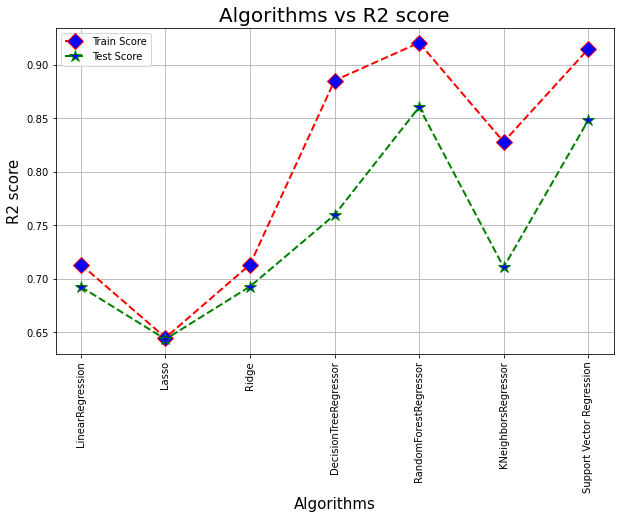

In [64]:
#R2 score plot
plt.figure(figsize=(10,6))
plt.title("Algorithms vs R2 score",fontsize=20)
plt.plot(regressor_names, R2_score_train, label = "line",linestyle='dashed', 
         linewidth=2,marker ='D',markerfacecolor='blue',markersize=12,color='Red')
plt.plot(regressor_names, R2_score_test, label = "line",linestyle='dashed', 
         linewidth=2,marker ='*',markerfacecolor='blue',markersize=12,color='green')
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("R2 score",fontsize=15)
plt.legend(['Train Score', 'Test Score'], loc='best')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### Hyper parameter tuning on models

In [68]:
from sklearn.model_selection import GridSearchCV

#### Hyperparamter tuning for lasso regression

In [108]:
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])
regressor = Lasso()
model = GridSearchCV(estimator=regressor, param_grid=dict(alpha=alphas))
model.fit(X_train,y_train)
#print(model.best_estimator_.alpha)
print(model.best_params_)
print(model.best_score_)

{'alpha': 0.005}
0.6987627020151974


In [73]:
regressor = Lasso(alpha=0.005)
model=regressor.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
r2_train=metrics.r2_score(y_train, y_train_pred)
R2_score_train.append(r2_train)
print('R2 score for train data ', r2_train)
y_test_pred = model.predict(X_test)
r2_test=metrics.r2_score(y_test, y_test_pred)
R2_score_test.append(r2_test)
print('R2 score for test data ',r2_test)

R2 score for train data  0.7130587629276128
R2 score for test data  0.6936548374953742


#### Hyperparamter tuning for ridge regression

In [107]:
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])
regressor = Ridge()
model = GridSearchCV(estimator=regressor, param_grid=dict(alpha=alphas))
model.fit(X_train,y_train)
#print(model.best_estimator_.alpha)
print(model.best_params_)
print(model.best_score_)

1.0
{'alpha': 1.0}
0.6986196759734891


In [80]:
regressor = Ridge(alpha=1)
model=regressor.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
r2_train=metrics.r2_score(y_train, y_train_pred)
R2_score_train.append(r2_train)
print('R2 score for train data ', r2_train)
y_test_pred = model.predict(X_test)
r2_test=metrics.r2_score(y_test, y_test_pred)
R2_score_test.append(r2_test)
print('R2 score for test data ',r2_test)

R2 score for train data  0.7133304118626999
R2 score for test data  0.6927729008794556


#### Hyperparamter tuning for Decision tree regression

In [82]:
# Hyper parameters range intialization for tuning 
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [87]:
#% time
regressor = DecisionTreeRegressor()
model=GridSearchCV(regressor,param_grid=parameters,cv=3,n_jobs = 1, verbose = 0)
model.fit(X_train,y_train)
#print(model.best_estimator_.alpha)
print(model.best_params_)
print(model.best_score_)

{'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
0.581532826113849


In [102]:
regressor = DecisionTreeRegressor(max_depth= 7, max_features= 'auto', max_leaf_nodes= 10, min_samples_leaf= 4, min_weight_fraction_leaf= 0.1, splitter='best')
model=regressor.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
r2_train=metrics.r2_score(y_train, y_train_pred)
R2_score_train.append(r2_train)
print('R2 score for train data ', r2_train)
y_test_pred = model.predict(X_test)
r2_test=metrics.r2_score(y_test, y_test_pred)
R2_score_test.append(r2_test)
print('R2 score for test data ',r2_test)

R2 score for train data  0.6311555320592606
R2 score for test data  0.5315659995499453


#### Hyperparamter tuning for Random forest regression

In [103]:
parameters = { 'bootstrap': [True], 
    'max_depth': [5, 10,15, 20,None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
regressor = RandomForestRegressor(random_state = 1)
model = GridSearchCV(estimator = regressor, param_grid = parameters, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
model.fit(X_train,y_train)
#print(model.get_params())
#print(model.best_params_.keys())
print(model.best_params_)
print(model.best_score_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}
0.8720986143174229


In [106]:
regressor = RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'auto', n_estimators= 15)
model=regressor.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
r2_train=metrics.r2_score(y_train, y_train_pred)
R2_score_train.append(r2_train)
print('R2 score for train data ', r2_train)
y_test_pred = model.predict(X_test)
r2_test=metrics.r2_score(y_test, y_test_pred)
R2_score_test.append(r2_test)
print('R2 score for test data ',r2_test)

R2 score for train data  0.9752757210040893
R2 score for test data  0.8878856590896868


#### Hyperparamter tuning for KNeighborsRegressor

In [ ]:
parameters = [{'n_neighbors':[i for i in range(1, 10)], 'p':[1, 2]}]
regressor = KNeighborsRegressor()
model = GridSearchCV(estimator=regressor, param_grid=parameters)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

In [ ]:
regressor = KNeighborsRegressor(alpha=1)
model=regressor.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
r2_train=metrics.r2_score(y_train, y_train_pred)
R2_score_train.append(r2_train)
print('R2 score for train data ', r2_train)
y_test_pred = model.predict(X_test)
r2_test=metrics.r2_score(y_test, y_test_pred)
R2_score_test.append(r2_test)
print('R2 score for test data ',r2_test)

#### Hyperparamter tuning for Support Vector Machine regressor

In [ ]:
# defining parameter range
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid','poly']}
regressor = SVR()
model = GridSearchCV(estimator=regressor, param_grid=parameters)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

In [ ]:
regressor = SVR(alpha=1)
model=regressor.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
r2_train=metrics.r2_score(y_train, y_train_pred)
R2_score_train.append(r2_train)
print('R2 score for train data ', r2_train)
y_test_pred = model.predict(X_test)
r2_test=metrics.r2_score(y_test, y_test_pred)
R2_score_test.append(r2_test)
print('R2 score for test data ',r2_test)

### Random forest given the best results because of the following reason

Random Forest is an ensemble learning technique used for solving supervised learning tasks, such as classification and regression. An advantageous feature of Random Forest is that it can overcome the overfitting problem across its training dataset. A forest in Random Forest usually consists of hundreds of thousands of trees. These trees are actually trained on different parts of the same training set.

More technically, an individual tree that grows very deep tends to learn from highly unpredictable patterns. This creates overfitting problems on the training sets. Moreover, low biases make the classifier a low performer even if your dataset quality is good in terms of the features presented. On the other hand, an Random Forest helps to average multiple decision trees together with the goal of reducing the variance to ensure consistency by computing proximities between pairs of cases.



### With PCA
- PCA is good for multicollinearity dataset

In [46]:
from sklearn.decomposition import PCA
pca = PCA()

In [47]:
std_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.153159
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.153159
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.153159
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.153159
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,-0.153159


In [48]:
pca.fit(std_data)

PCA()

In [49]:
pca.components_

array([[-0.08756216, -0.21990782,  0.41411991, -0.55743646,  0.52363673,
        -0.03683848,  0.42051702,  0.09672458],
       [-0.02950166,  0.63966594, -0.15260257,  0.00679035,  0.34400623,
        -0.66785588,  0.01137675, -0.04606837],
       [ 0.82857813, -0.23289393, -0.41555717, -0.211986  ,  0.17318438,
        -0.07293372, -0.02584267, -0.0749191 ],
       [ 0.07165699,  0.03321204, -0.07406864,  0.05534693,  0.00317936,
        -0.02151514, -0.05514425,  0.99080719],
       [ 0.08283283,  0.29377879,  0.2360952 , -0.22343379,  0.3346134 ,
         0.38265377, -0.73647835, -0.01946138],
       [ 0.20156251, -0.39999096,  0.55044125,  0.41972641,  0.08361615,
        -0.47476658, -0.29617249, -0.01052849],
       [ 0.23177691,  0.22683404,  0.35224715, -0.51033427, -0.67495784,
        -0.22878099, -0.04190136,  0.02533984],
       [ 0.44561958,  0.43517007,  0.37978765,  0.39329779,  0.05418006,
         0.35023031,  0.43295848, -0.00886545]])

In [50]:
pca.explained_variance_ratio_

array([0.27171381, 0.17602648, 0.16705152, 0.12333047, 0.12104523,
       0.1144809 , 0.02258779, 0.00376381])

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27171381, 0.44774028, 0.6147918 , 0.73812227, 0.85916751,
       0.9736484 , 0.99623619, 1.        ])

OBSERVATION: As we can see that only 6 PCA components are explaining 97.4% variance, so lets go ahead and consider these six components.

In [52]:
pca_trns_data = pca.fit_transform(std_data)

In [53]:
pca_trns_data

array([[-0.7517991 , -1.29479878,  2.67163895, ..., -0.10825306,
         0.81764982, -0.20807124],
       [-0.75890931, -1.42370184,  2.657562  , ..., -0.19988789,
         0.77349273, -0.14047319],
       [-3.26320833,  0.61421638,  0.04066602, ...,  1.05602112,
        -0.20248893, -0.11053007],
       ...,
       [ 0.05369181,  1.09104434, -1.61133796, ...,  0.59566886,
         0.15283178, -0.03494543],
       [ 0.12435404,  1.15812575, -0.72289577, ..., -1.42791468,
        -0.76707404, -0.17761081],
       [-0.20840708,  1.22673302, -0.39164076, ...,  1.1614168 ,
        -0.24663362,  0.01092698]])

In [54]:
pca.components_

array([[-0.08756216, -0.21990782,  0.41411991, -0.55743646,  0.52363673,
        -0.03683848,  0.42051702,  0.09672458],
       [-0.02950166,  0.63966594, -0.15260257,  0.00679035,  0.34400623,
        -0.66785588,  0.01137675, -0.04606837],
       [ 0.82857813, -0.23289393, -0.41555717, -0.211986  ,  0.17318438,
        -0.07293372, -0.02584267, -0.0749191 ],
       [ 0.07165699,  0.03321204, -0.07406864,  0.05534693,  0.00317936,
        -0.02151514, -0.05514425,  0.99080719],
       [ 0.08283283,  0.29377879,  0.2360952 , -0.22343379,  0.3346134 ,
         0.38265377, -0.73647835, -0.01946138],
       [ 0.20156251, -0.39999096,  0.55044125,  0.41972641,  0.08361615,
        -0.47476658, -0.29617249, -0.01052849],
       [ 0.23177691,  0.22683404,  0.35224715, -0.51033427, -0.67495784,
        -0.22878099, -0.04190136,  0.02533984],
       [ 0.44561958,  0.43517007,  0.37978765,  0.39329779,  0.05418006,
         0.35023031,  0.43295848, -0.00886545]])

In [55]:
pca_new = PCA(n_components = 6)

In [56]:
pca_new=pca_new.fit_transform(std_data)

In [57]:
pca_new

array([[-0.7517991 , -1.29479878,  2.67163895,  0.05596583,  0.9808432 ,
        -0.10825306],
       [-0.75890931, -1.42370184,  2.657562  ,  0.05181319,  1.05469931,
        -0.19988789],
       [-3.26320833,  0.61421638,  0.04066602,  0.22462998,  0.69261093,
         1.05602112],
       ...,
       [ 0.05369181,  1.09104434, -1.61133796, -0.23385267, -0.25602109,
         0.59566886],
       [ 0.12435404,  1.15812575, -0.72289577, -0.15721532,  0.37989496,
        -1.42791468],
       [-0.20840708,  1.22673302, -0.39164076, -0.09437203, -0.3211812 ,
         1.1614168 ]])

In [58]:
pca_df = pd.DataFrame(pca_new)
pca_df.head()

,0,1,2,3,4,5
0,-0.751799,-1.294799,2.671639,0.055966,0.980843,-0.108253
1,-0.758909,-1.423702,2.657562,0.051813,1.054699,-0.199888
2,-3.263208,0.614216,0.040666,0.224630,0.692611,1.056021
3,-3.263208,0.614216,0.040666,0.224630,0.692611,1.056021
4,-0.992254,0.199790,-0.754863,-0.136608,-0.970235,-1.002451


In [59]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = pca_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(pca_df.values, i)
                          for i in range(len(pca_df.columns))]
  
vif_data

,feature,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0


In [60]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(pca_df, target, train_size = 0.75, random_state = 0)

In [61]:
R2_score_train1=[]
R2_score_test1=[]

for regressor in regressors:
    model=regressor.fit(X_train1,y_train1)
    y_train_pred1 = model.predict(X_train1)
    r2_train1=metrics.r2_score(y_train1, y_train_pred1)
    R2_score_train1.append(r2_train1)
    print('R2 score for train data ', r2_train1)
    y_test_pred1 = model.predict(X_test1)
    r2_test1=metrics.r2_score(y_test1, y_test_pred1)
    R2_score_test1.append(r2_test1)
    print('R2 score for test data ',r2_test1)

R2 score for train data  0.6810356256377081
R2 score for test data  0.6735759334011137
R2 score for train data  0.6430695648243289
R2 score for test data  0.6384292251909907
R2 score for train data  0.6810347383662412
R2 score for test data  0.6735879967831615
R2 score for train data  0.8453792981998568
R2 score for test data  0.7463986391123769
R2 score for train data  0.9057920888232827
R2 score for test data  0.8245190492093352
R2 score for train data  0.8320014534769088
R2 score for test data  0.7023834064525969
R2 score for train data  0.8786693753923355
R2 score for test data  0.8083289736891165


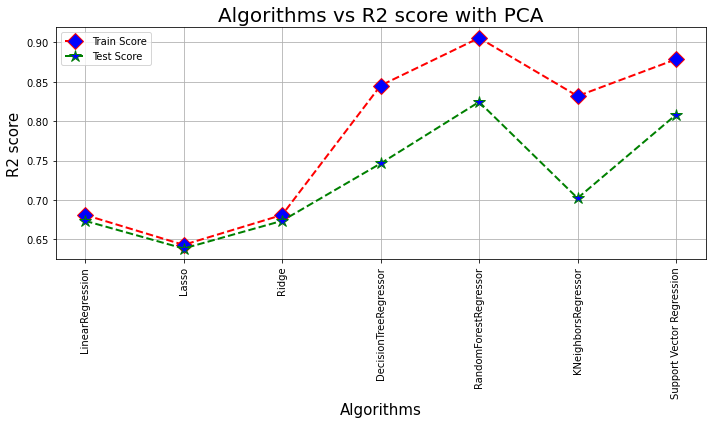

In [63]:
#R2 score plot
plt.figure(figsize=(10,6))
plt.title("Algorithms vs R2 score with PCA",fontsize=20)
plt.plot(regressor_names, R2_score_train1, label = "line",linestyle='dashed', 
         linewidth=2,marker ='D',markerfacecolor='blue',markersize=12,color='Red')
plt.plot(regressor_names, R2_score_test1, label = "line",linestyle='dashed', 
         linewidth=2,marker ='*',markerfacecolor='blue',markersize=12,color='green')
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("R2 score",fontsize=15)
plt.legend(['Train Score', 'Test Score'], loc='best')
plt.xticks(rotation = 90)
plt.grid()
plt.tight_layout()
plt.show()

#### Hyperparamter tuning for lasso regression on PCA dataset

In [110]:
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])
regressor = Lasso()
model = GridSearchCV(estimator=regressor, param_grid=dict(alpha=alphas))
model.fit(X_train1,y_train1)
#print(model.best_estimator_.alpha)
print(model.best_params_)
print(model.best_score_)

{'alpha': 0.01}
0.6665066453841767


In [111]:
regressor = Lasso(alpha=0.01)
model=regressor.fit(X_train1,y_train1)
y_train_pred1 = model.predict(X_train1)
r2_train1=metrics.r2_score(y_train1, y_train_pred1)
R2_score_train1.append(r2_train1)
print('R2 score for train data ', r2_train1)
y_test_pred1 = model.predict(X_test1)
r2_test1=metrics.r2_score(y_test1, y_test_pred1)
R2_score_test1.append(r2_test1)
print('R2 score for test data ',r2_test1)

R2 score for train data  0.6805457226400133
R2 score for test data  0.6731279443925087


#### Hyperparamter tuning for ridge regression on PCA dataset

In [113]:
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])
regressor = Ridge()
model = GridSearchCV(estimator=regressor, param_grid=dict(alpha=alphas))
model.fit(X_train1,y_train1)
#print(model.best_estimator_.alpha)
print(model.best_params_)
print(model.best_score_)

{'alpha': 5.0}
0.6663970687010057


In [114]:
regressor = Ridge(alpha=5.0)
model=regressor.fit(X_train1,y_train1)
y_train_pred1 = model.predict(X_train1)
r2_train1=metrics.r2_score(y_train1, y_train_pred1)
R2_score_train1.append(r2_train1)
print('R2 score for train data ', r2_train1)
y_test_pred1 = model.predict(X_test1)
r2_test1=metrics.r2_score(y_test1, y_test_pred1)
R2_score_test1.append(r2_test1)
print('R2 score for test data ',r2_test1)

R2 score for train data  0.6810136535089284
R2 score for test data  0.673617784601287


#### Hyperparamter tuning for Decision tree regression on PCA dataset

In [115]:
# Hyper parameters range intialization for tuning 
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [116]:
#% time
regressor = DecisionTreeRegressor()
model=GridSearchCV(regressor,param_grid=parameters,cv=3,n_jobs = 1, verbose = 0)
model.fit(X_train1,y_train1)
#print(model.best_estimator_.alpha)
print(model.best_params_)
print(model.best_score_)

KeyboardInterrupt: 

In [ ]:
regressor = Ridge(alpha=5.0)
model=regressor.fit(X_train1,y_train1)
y_train_pred1 = model.predict(X_train1)
r2_train1=metrics.r2_score(y_train1, y_train_pred1)
R2_score_train1.append(r2_train1)
print('R2 score for train data ', r2_train1)
y_test_pred1 = model.predict(X_test1)
r2_test1=metrics.r2_score(y_test1, y_test_pred1)
R2_score_test1.append(r2_test1)
print('R2 score for test data ',r2_test1)

#### Hyperparamter tuning for Random forest regression on PCA dataset

In [ ]:
parameters = { 'bootstrap': [True], 
    'max_depth': [5, 10,15, 20,None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
regressor = RandomForestRegressor(random_state = 1)
model = GridSearchCV(estimator = regressor, param_grid = parameters, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
model.fit(X_train,y_train)
#print(model.get_params())
#print(model.best_params_.keys())
print(model.best_params_)
print(model.best_score_)

In [ ]:
regressor = RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'auto', n_estimators= 15)
model=regressor.fit(X_train1,y_train1)
y_train_pred1 = model.predict(X_train1)
r2_train1=metrics.r2_score(y_train1, y_train_pred1)
R2_score_train1.append(r2_train1)
print('R2 score for train data ', r2_train1)
y_test_pred1 = model.predict(X_test1)
r2_test1=metrics.r2_score(y_test1, y_test_pred1)
R2_score_test1.append(r2_test1)
print('R2 score for test data ',r2_test1)

#### Hyperparamter tuning for KNeighborsRegressor on PCA dataset

In [ ]:
parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2]}]
regressor = KNeighborsRegressor()
model = GridSearchCV(estimator=regressor, param_grid=parameters)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

In [ ]:
regressor = KNeighborsRegressor(alpha=1)
model=regressor.fit(X_train1,y_train1)
y_train_pred1 = model.predict(X_train1)
r2_train1=metrics.r2_score(y_train1, y_train_pred1)
R2_score_train1.append(r2_train1)
print('R2 score for train data ', r2_train1)
y_test_pred1 = model.predict(X_test1)
r2_test1=metrics.r2_score(y_test1, y_test_pred1)
R2_score_test1.append(r2_test1)
print('R2 score for test data ',r2_test1)

#### Hyperparamter tuning for Support Vector Machine regressor on PCA dataset

In [ ]:
# defining parameter range
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid','poly']}
regressor = SVR()
model = GridSearchCV(estimator=regressor, param_grid=parameters)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

In [ ]:
regressor = SVR()
model=regressor.fit(X_train1,y_train1)
y_train_pred1 = model.predict(X_train1)
r2_train1=metrics.r2_score(y_train1, y_train_pred1)
R2_score_train1.append(r2_train1)
print('R2 score for train data ', r2_train1)
y_test_pred1 = model.predict(X_test1)
r2_test1=metrics.r2_score(y_test1, y_test_pred1)
R2_score_test1.append(r2_test1)
print('R2 score for test data ',r2_test1)

#### Why normal dataset performing well than PCA dataset
- First reason is it reduces the dimensions here in the dataset we taken only 6 components so it reduce some accuracy.
- Second reason is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature has large variance as important features, but the feature has large variance can have noting to do with the prediction target.